**for plotting: animator_funcAnimation.ipynb**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

**Covid datasets reading (covid_global_mnly_sum.ipynb)**

In [2]:
#output of covid_global_mnly_sum.ipynb
df_raw = pd.read_csv('/Users/preethamvignesh/Downloads/Covid19-master/covid_global_mnly_death_sum.csv')
df_raw

,Unnamed: 0,Country,Lat,Long,Date,Death
0,0,Afghanistan,33.939110,67.709953,2020-01-31,0.0
1,1,Albania,41.153300,20.168300,2020-01-31,0.0
2,2,Algeria,28.033900,1.659600,2020-01-31,0.0
3,3,Andorra,42.506300,1.521800,2020-01-31,0.0
4,4,Angola,-11.202700,17.873900,2020-01-31,0.0
...,...,...,...,...,...,...
4105,4105,Vietnam,14.058324,108.277199,2021-03-31,0.0
4106,4106,West Bank and Gaza,31.952200,35.233200,2021-03-31,128.0
4107,4107,Yemen,15.552727,48.516388,2021-03-31,20.0
4108,4108,Zambia,-13.133897,27.849332,2021-03-31,46.0


**Renaming the Column elements**

In [3]:
#Column name rename
# df_raw.rename(columns={'US': 'United States'}, inplace=True)

#column elements rename
df_raw['Country'].replace({'US': 'United States'},inplace=True)

In [4]:
# print(*df_raw.Country)

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4110 non-null   int64  
 1   Country     4110 non-null   object 
 2   Lat         4095 non-null   float64
 3   Long        4095 non-null   float64
 4   Date        4110 non-null   object 
 5   Death       4110 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 192.8+ KB


In [6]:
print(df_raw.Date)

0       2020-01-31
1       2020-01-31
2       2020-01-31
3       2020-01-31
4       2020-01-31
           ...    
4105    2021-03-31
4106    2021-03-31
4107    2021-03-31
4108    2021-03-31
4109    2021-03-31
Name: Date, Length: 4110, dtype: object


**Reading the iso_code, continent, and country columns from another Covid table**

In [7]:
df_all = pd.read_csv('/Users/preethamvignesh/Downloads/Covid19-master/owid-covid-data.csv')
df_all

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61861,ZWE,Africa,Zimbabwe,2021-01-19,28675.0,783.0,776.571,825.0,52.0,39.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
61862,ZWE,Africa,Zimbabwe,2021-01-20,29408.0,733.0,736.000,879.0,54.0,41.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
61863,ZWE,Africa,Zimbabwe,2021-01-21,30047.0,639.0,668.429,917.0,38.0,40.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
61864,ZWE,Africa,Zimbabwe,2021-01-22,30523.0,476.0,630.571,962.0,45.0,42.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


**picking the iso_code, continent, and country columns only**

In [8]:
df_pick = df_all[["iso_code","continent","location"]]
df_pick1 = df_pick.copy()
df_pick1

,iso_code,continent,location
0,AFG,Asia,Afghanistan
1,AFG,Asia,Afghanistan
2,AFG,Asia,Afghanistan
3,AFG,Asia,Afghanistan
4,AFG,Asia,Afghanistan
...,...,...,...
61861,ZWE,Africa,Zimbabwe
61862,ZWE,Africa,Zimbabwe
61863,ZWE,Africa,Zimbabwe
61864,ZWE,Africa,Zimbabwe


In [9]:
# print(*df_pick1.location)

**changing location column name to Country**

In [10]:
df_pick1.rename(columns={'location': 'Country'}, inplace=True)
df_pick1

,iso_code,continent,Country
0,AFG,Asia,Afghanistan
1,AFG,Asia,Afghanistan
2,AFG,Asia,Afghanistan
3,AFG,Asia,Afghanistan
4,AFG,Asia,Afghanistan
...,...,...,...
61861,ZWE,Africa,Zimbabwe
61862,ZWE,Africa,Zimbabwe
61863,ZWE,Africa,Zimbabwe
61864,ZWE,Africa,Zimbabwe


**dropping the duplicates from the Table**

In [11]:
df_pick2 = df_pick1.drop_duplicates()
df_pick2.shape

(193, 3)

In [12]:
#Printing the all names in the Country column(*)
# print(*df_pick2.Country)

**Merging the two tables on=country**

In [13]:
df_new = (pd.merge(df_raw, df_pick2, on='Country'))
df_new

,Unnamed: 0,Country,Lat,Long,Date,Death,iso_code,continent
0,0,Afghanistan,33.939110,67.709953,2020-01-31,0.0,AFG,Asia
1,274,Afghanistan,33.939110,67.709953,2020-02-29,0.0,AFG,Asia
2,548,Afghanistan,33.939110,67.709953,2020-03-31,4.0,AFG,Asia
3,822,Afghanistan,33.939110,67.709953,2020-04-30,60.0,AFG,Asia
4,1096,Afghanistan,33.939110,67.709953,2020-05-31,194.0,AFG,Asia
...,...,...,...,...,...,...,...,...
3925,3013,Zimbabwe,-19.015438,29.154857,2020-11-30,33.0,ZWE,Africa
3926,3287,Zimbabwe,-19.015438,29.154857,2020-12-31,87.0,ZWE,Africa
3927,3561,Zimbabwe,-19.015438,29.154857,2021-01-31,854.0,ZWE,Africa
3928,3835,Zimbabwe,-19.015438,29.154857,2021-02-28,246.0,ZWE,Africa


In [14]:
# print(*df_new.continent)

In [15]:
#Print the all country names onetime only.
df_new.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'I

In [16]:
#For animation we need Date is in integer only
import numpy as np
df_new['Date'] = pd.to_datetime(df_new['Date']) 
# df_new['date_delta'] = (df_new['Date'] - df_new['Date'].min())  / np.timedelta64(1,'D')

#Date is object so I converted first to string and then convert to int
df_new["yyyy_mm"] = df_new['Date'].dt.strftime('%Y%m').astype(str).astype(int)

df_new

,Unnamed: 0,Country,Lat,Long,Date,Death,iso_code,continent,yyyy_mm
0,0,Afghanistan,33.939110,67.709953,2020-01-31,0.0,AFG,Asia,202001
1,274,Afghanistan,33.939110,67.709953,2020-02-29,0.0,AFG,Asia,202002
2,548,Afghanistan,33.939110,67.709953,2020-03-31,4.0,AFG,Asia,202003
3,822,Afghanistan,33.939110,67.709953,2020-04-30,60.0,AFG,Asia,202004
4,1096,Afghanistan,33.939110,67.709953,2020-05-31,194.0,AFG,Asia,202005
...,...,...,...,...,...,...,...,...,...
3925,3013,Zimbabwe,-19.015438,29.154857,2020-11-30,33.0,ZWE,Africa,202011
3926,3287,Zimbabwe,-19.015438,29.154857,2020-12-31,87.0,ZWE,Africa,202012
3927,3561,Zimbabwe,-19.015438,29.154857,2021-01-31,854.0,ZWE,Africa,202101
3928,3835,Zimbabwe,-19.015438,29.154857,2021-02-28,246.0,ZWE,Africa,202102


In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3930 entries, 0 to 3929
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  3930 non-null   int64         
 1   Country     3930 non-null   object        
 2   Lat         3915 non-null   float64       
 3   Long        3915 non-null   float64       
 4   Date        3930 non-null   datetime64[ns]
 5   Death       3930 non-null   float64       
 6   iso_code    3930 non-null   object        
 7   continent   3930 non-null   object        
 8   yyyy_mm     3930 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 307.0+ KB


In [18]:
#here picking the particular year Deaths and are descending order
current_year = 202008
dff_1 = (df_new[df_new['yyyy_mm'].eq(current_year)]
       .sort_values(by='Death', ascending=False)
       .head(10))
dff_1

,Unnamed: 0,Country,Lat,Long,Date,Death,iso_code,continent,yyyy_mm
3577,2167,United States,40.000000,-100.000000,2020-08-31,29623.0,USA,North America,202008
457,1948,Brazil,-14.235000,-51.925300,2020-08-31,28906.0,BRA,South America,202008
2107,2064,India,20.593684,78.962880,2020-08-31,28777.0,IND,Asia,202008
2602,2099,Mexico,23.634500,-102.552800,2020-08-31,17726.0,MEX,North America,202008
2977,2125,Peru,-9.190000,-75.015200,2020-08-31,9767.0,PER,South America,202008
1342,2009,Colombia,4.570900,-74.297300,2020-08-31,9557.0,COL,South America,202008
3337,2149,South Africa,-30.559500,22.937500,2020-08-31,6144.0,ZAF,Africa,202008
97,1924,Argentina,-38.416100,-63.616700,2020-08-31,5117.0,ARG,South America,202008
2137,2066,Iran,32.427908,53.688046,2020-08-31,4805.0,IRN,Asia,202008
3067,2131,Russia,61.524010,105.318756,2020-08-31,3189.0,RUS,Europe,202008


<BarContainer object of 10 artists>

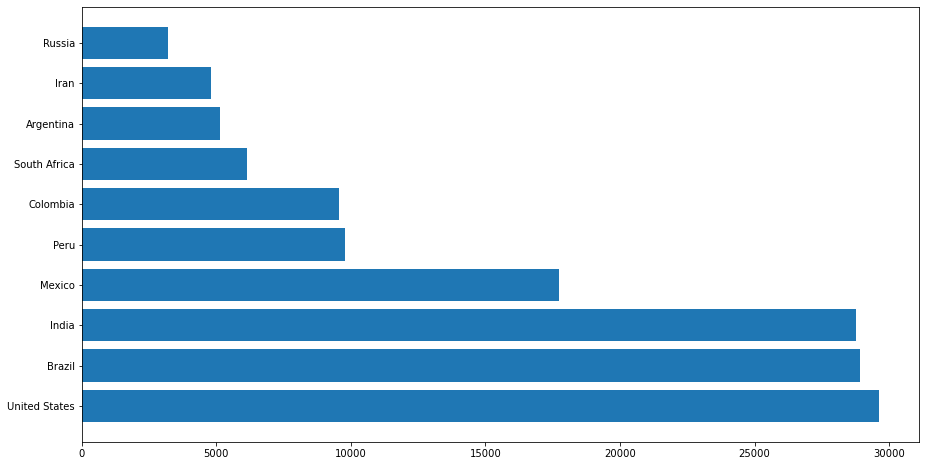

In [19]:
#plot for particular year Deaths
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff_1['Country'], dff_1['Death'])

In [20]:
dff_1.continent.unique()

array(['North America', 'South America', 'Asia', 'Africa', 'Europe'],
      dtype=object)

In [21]:
colors = dict(zip(
    ['India', 'Europe', 'Asia', 'South America',
     'North America', 'Africa'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50']
))
group_lk = df_new.set_index('Country')['continent'].to_dict()
# group_lk

Text(1, 0.4, '202008')

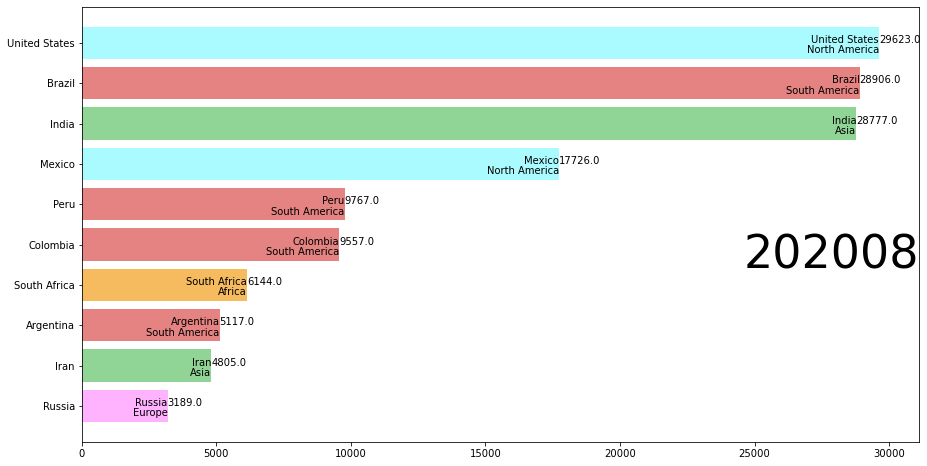

In [22]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff_1[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['Country'], dff['Death'], color=[colors[group_lk[x]] for x in dff['Country']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(dff['Death'], dff['Country'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i-.25, group_lk[name],  ha='right')  # Asia: group name
    ax.text(value, i,     value,           ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

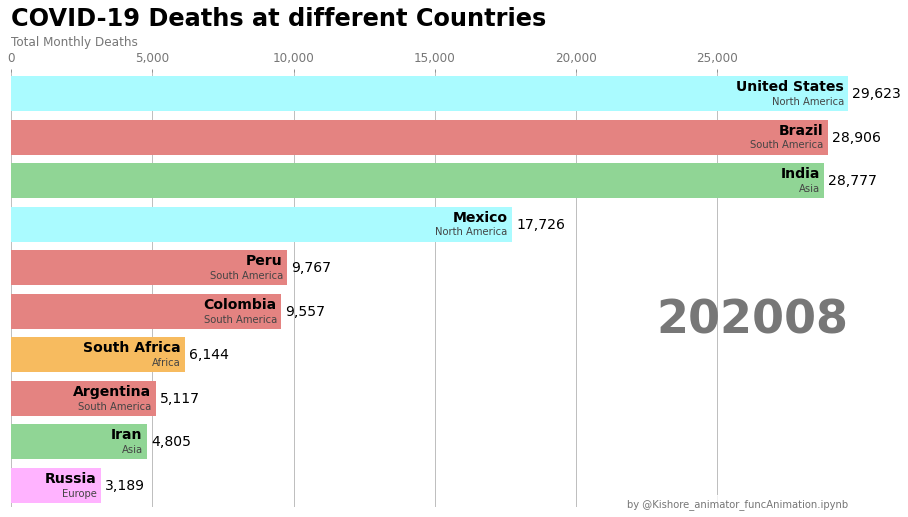

In [23]:
#Here is the sub routine for barchart animation
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(current_year):
    dff = df_new[df_new['yyyy_mm'].eq(current_year)].sort_values(by='Death', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['Country'], dff['Death'], color=[colors[group_lk[x]] for x in dff['Country']])
    dx = dff['Death'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Death'], dff['Country'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    ax.text(1, 0.4, current_year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Total Monthly Deaths', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, 'COVID-19 Deaths at different Countries',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax.text(1, 0, 'by @Kishore_animator_funcAnimation.ipynb', transform=ax.transAxes, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(202008)

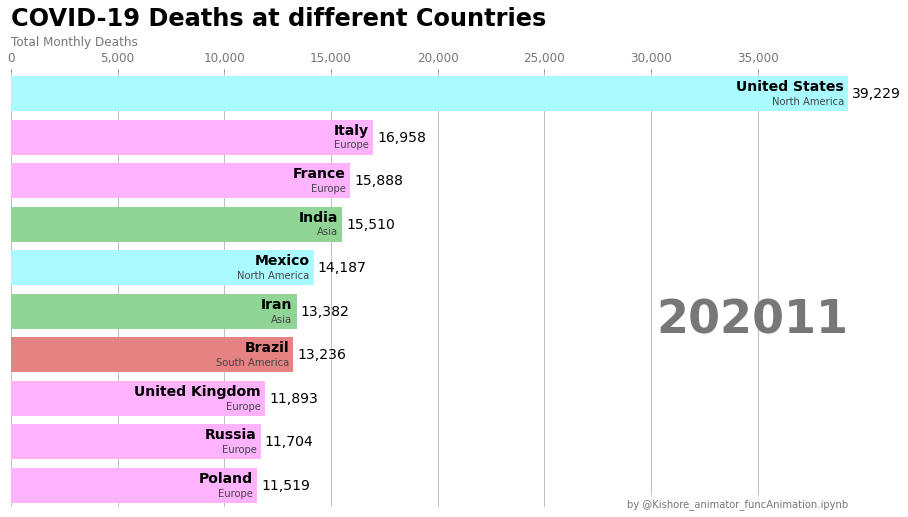

In [24]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(202002, 202012))
HTML(animator.to_jshtml())
# or use animator.to_html5_video() or animator.save()

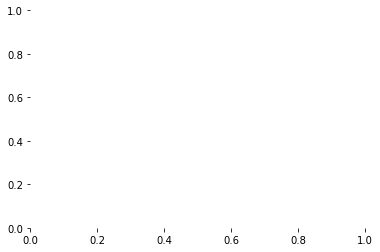

In [25]:
###Saving as gif format
fgg = "/Users/preethamvignesh/Downloads/covid_mnly_country_continent_deaths_animation.gif" 
writergif = animation.PillowWriter(fps=30) 
animator.save(fgg, writer=writergif)

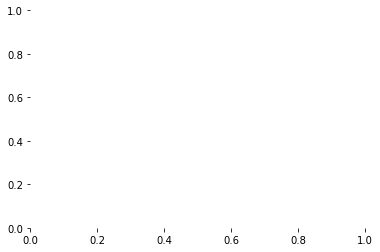

In [30]:
###PNG format
from matplotlib import animation
from numpngw import AnimatedPNGWriter
writer = AnimatedPNGWriter(fps=1)
animator.save('/Users/preethamvignesh/Downloads/covid_mnly_country_continent_deaths_animation.png', dpi=50, writer=writer)

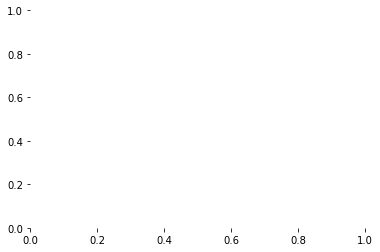

In [27]:
fgg3 = "/Users/preethamvignesh/Downloads/covid_mnly_country_continent_deaths_animation1.png" 
writergif = animation.PillowWriter(fps=5000) 
animator.save(fgg3, writer=writergif)

In [28]:
##Saving Matplotlib as .MP4 file (not working)
# fgg1 = "/Users/preethamvignesh/Downloads/animator_funcAnimation.mp4"
# writervideo = animation.FFMpegWriter(fps=60) 
# animator.save(fgg1, writer=writervideo)
# # or
# # writervideo = animation.FFMpegWriter() 
# # animator.save(fgg1, writer=writervideo,fps=60)